In [1]:
# Dependencies and Setup
from fadpackage.constants import * # constants
from fadpackage.helpers import *   # liberaries and functions
from fadpackage.classes import *   # classes

<h3>
    <font color="#940f0f">4. Analysis</font>
</h3>
<h5>
    <font color="#940f0f">1.4.Data preprocessing </font>
</h5>

In [2]:
# import the packages
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import math


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import seaborn as sns

pd.options.mode.chained_assignment = None

# read the data
df_trans = pd.read_csv(DATA_URL+'trans.csv', delimiter=',', low_memory=False)  # The transactions.
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  int64  
 3   type        1056320 non-null  object 
 4   operation   873206 non-null   object 
 5   amount      1056320 non-null  float64
 6   balance     1056320 non-null  float64
 7   k_symbol    574439 non-null   object 
 8   bank        273508 non-null   object 
 9   account     295389 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 80.6+ MB


In [3]:
df_trans

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,981231,PRIJEM,NaN,62.3,13729.4,UROK,NaN,NaN
1056316,3627616,2935,981231,PRIJEM,NaN,81.3,19544.9,UROK,NaN,NaN
1056317,3625403,2869,981231,PRIJEM,NaN,60.2,14638.2,UROK,NaN,NaN
1056318,3626683,2907,981231,PRIJEM,NaN,107.5,23453.0,UROK,NaN,NaN


In [4]:
# filter for features
df_trans = df_trans[['date', 'account_id', 'type', 'amount']]

# Convert the date into date format.
df_trans['date'] = pd.to_datetime(df_trans['date'], format='%y%m%d')

In [5]:
df_trans = df_trans.loc[(df_trans['date'] >= "1997-10-01") & (df_trans['date'] < "1997-11-01")]
df_trans

,date,account_id,type,amount
657611,1997-10-01,3571,VYDAJ,1300.0
657612,1997-10-01,2370,PRIJEM,300.0
657613,1997-10-01,7733,VYDAJ,14200.0
657614,1997-10-01,7753,VYDAJ,12600.0
657615,1997-10-01,7721,VYDAJ,18000.0
...,...,...,...,...
681601,1997-10-31,1775,VYDAJ,14.6
681602,1997-10-31,1767,VYDAJ,14.6
681603,1997-10-31,1772,VYDAJ,30.0
681604,1997-10-31,1768,VYDAJ,14.6


C:\Users\Theid\AppData\Local\Temp\ipykernel_1492\2257885171.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trans['amount'], bins=50)


<AxesSubplot:xlabel='amount', ylabel='Density'>

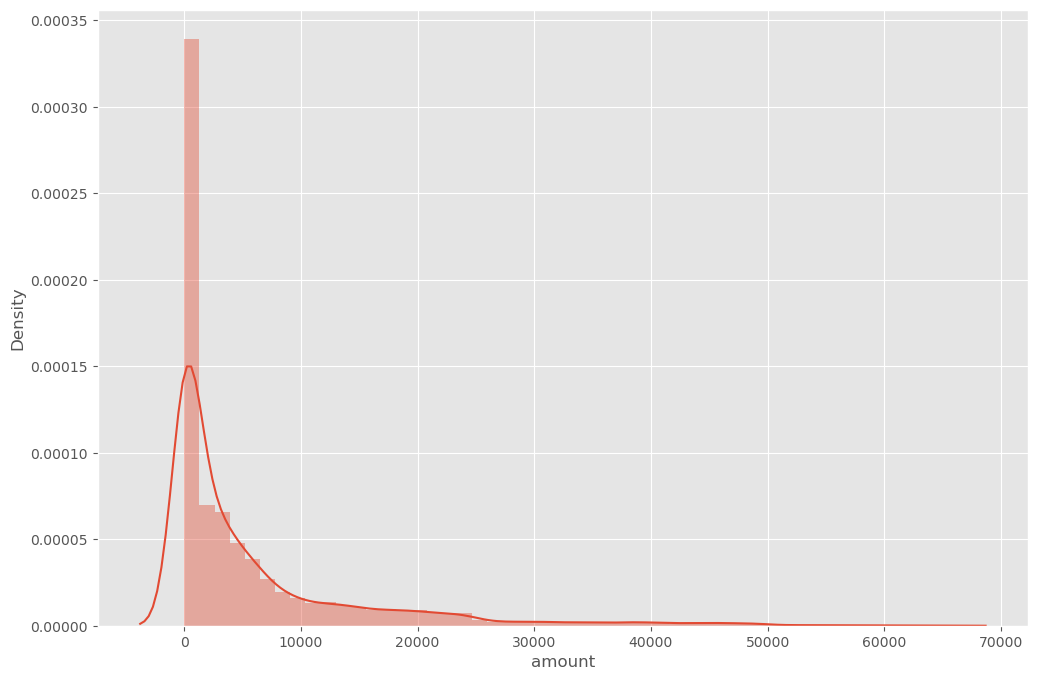

In [6]:
sns.distplot(df_trans['amount'], bins=50)


C:\Users\Theid\AppData\Local\Temp\ipykernel_1492\704999825.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trans['amount'], bins=50)


<AxesSubplot:xlabel='type', ylabel='count'>

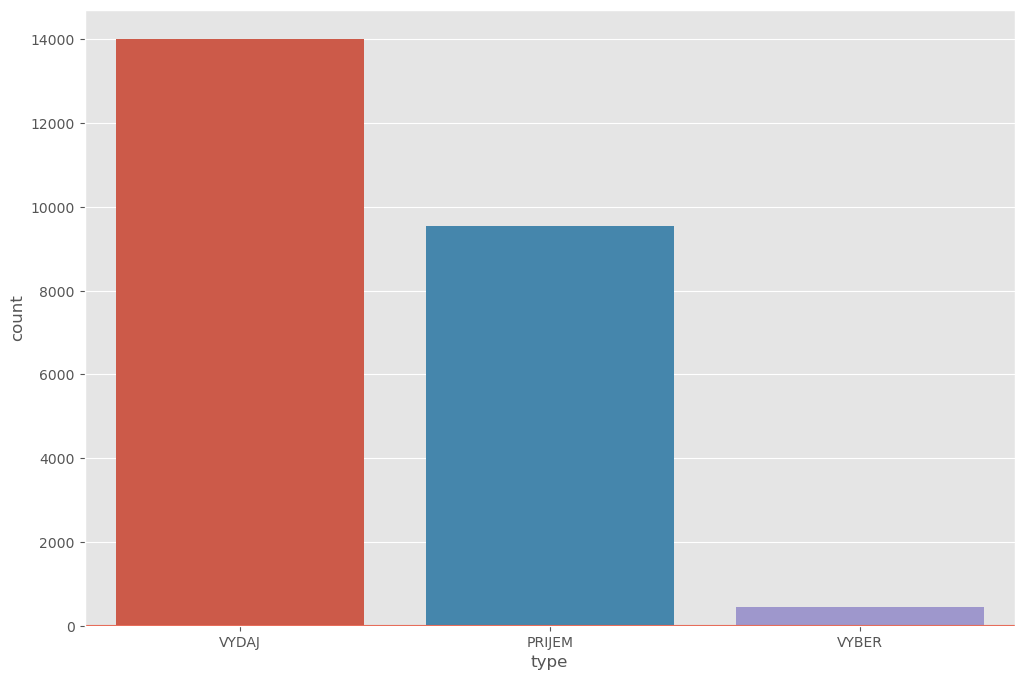

In [7]:
sns.distplot(df_trans['amount'], bins=50)

sns.countplot(x='type', data=df_trans)

In [8]:
# Change the transaction types to English.
to_replace = {'PRIJEM': 'CREDIT', 'VYDAJ': 'WITHDRAWAL', 'VYBER': 'WITHDRAWAL'}
df_trans['type'] = df_trans['type'].replace(to_replace)
df_trans

,date,account_id,type,amount
657611,1997-10-01,3571,WITHDRAWAL,1300.0
657612,1997-10-01,2370,CREDIT,300.0
657613,1997-10-01,7733,WITHDRAWAL,14200.0
657614,1997-10-01,7753,WITHDRAWAL,12600.0
657615,1997-10-01,7721,WITHDRAWAL,18000.0
...,...,...,...,...
681601,1997-10-31,1775,WITHDRAWAL,14.6
681602,1997-10-31,1767,WITHDRAWAL,14.6
681603,1997-10-31,1772,WITHDRAWAL,30.0
681604,1997-10-31,1768,WITHDRAWAL,14.6


In [13]:
def convert_and_profile(dfs):
    """
    For each DataFrame in a list, saves its train and test subsets as CSV files,
    and generates and saves a profile report for the train subset.

    Args:
        dfs: A list of DataFrames.

    Returns:
        None.
    """
    query_profile_report = f"""ProfileReport({dfs}, explorative=True, dark_mode=True)"""
    profile_report = eval(query_profile_report)
    profile_report_file_path = Path(f'../results/{dfs}_profile.html')
    try:
        profile_report_file_path.resolve(strict=True)
    except FileNotFoundError:
        profile_report.to_file(profile_report_file_path)

In [14]:
convert_and_profile("df_trans")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# save new dataframe
df_trans.to_csv(DATA_NEW+'trans_mod.csv', index=False)

In [ ]:
df_withdrawals = df_trans.query('type == "WITHDRAWAL"').sort_values(by=['account_id', 'date']).set_index('date')

df_withdrawals.head()

In [ ]:
def generate_rolling_features(df, window_size):
    for i, item in enumerate(window_size):
        df["sum_"+str(item)] = df.groupby(["account_id"])["amount"].\
        transform(lambda s: s.rolling(timedelta(days=item)).sum())

        df["mean_"+str(item)] = df.groupby(["account_id"])["amount"].\
        transform(lambda s: s.rolling(timedelta(days=item)).mean())

        df["count_"+str(item)] = df.groupby(["account_id"])["amount"].\
        transform(lambda s: s.rolling(timedelta(days=item)).count())
    df.to_csv(DATA_NEW+'trans_mod_withdrawal.csv', index=True)
    return df

In [ ]:
generate_rolling_features(df_withdrawals, [3, 15, 30])

In [ ]:
sns.distplot(df_withdrawals['sum_3'], bins=50)

sns.countplot(x='count_3', data=df_withdrawals)

sns.catplot(x="count_3", y="sum_3",
            kind="box", data=df_withdrawals, order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            aspect=3.0)

In [ ]:
df_trans_3d = df_withdrawals.loc[(df_withdrawals['count_3'] == 4)]
df_trans_3d = df_trans_3d[['account_id', 'type', 'sum_3']]
df_trans_3d.sort_values(by='date')

In [ ]:
sum_3days_column = df_trans_3d['sum_3']

# Calculate the IQR
q1 = sum_3days_column.quantile(0.25)
q3 = sum_3days_column.quantile(0.75)
iqr = q3 - q1
print("Interquartile Range (Q1):", q1)
print("Interquartile Range (Q3):", q3)
print("Interquartile Range (IQR):", iqr)
li=q1-(1.5*iqr)
ti=q3+(1.5*iqr)
print("Interquartile Range (li):", li)
print("Interquartile Range (Ti):", ti)

In [ ]:
number_of_outliers = (df_trans_3d.loc[df_trans_3d['sum_3'] >= ti]).count()
number_of_outliers

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(df_trans_3d.index, df_trans_3d['sum_3'], marker='o', edgecolor='black',
            facecolor=np.where(df_trans_3d['sum_3'] > ti, 'red', 'tab:blue'), label='RSI')
plt.axhline(0, linestyle='--', color='orange')
plt.axhline(ti, linestyle='--', color='tab:blue')
plt.xticks(rotation=45, rotation_mode='anchor', ha='right', fontsize='12')
plt.yticks(fontsize='12')
plt.legend(fontsize='12')
plt.xlabel('Date (yyyy-mm-dd)', fontsize=14)
plt.ylabel('RSI (%)', fontsize=14)
plt.show()

In [ ]:
df_trans

In [ ]:
df_trans_account = df_trans.loc[(df_trans['account_id'] == 11111)]
df_trans_account

In [ ]:
grouped = df_trans_account.groupby('type')['amount'].sum()

# Access the sums of withdrawals and credits
withdrawals_sum = grouped['WITHDRAWAL']
credits_sum = grouped['CREDIT']

print("Sum of Withdrawals:", withdrawals_sum)
print("Sum of Credits:", credits_sum)

In [ ]:
balance=credits_sum-withdrawals_sum
balance

In [ ]:
sns.distplot(df_withdrawals['sum_15'], bins=50)

sns.countplot(x='count_15', data=df_withdrawals)

sns.catplot(x="count_15", y="sum_15",
            kind="box", data=df_withdrawals, order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            aspect=3.0)

In [ ]:
def violin_plot(df):
    """
    Create a violin plot for a DataFrame

    Args:
        df: A pandas DataFrames that will be analyzed.
        
    Returns:
        A plot includes a statistical summary of the features.
    """
    # ceate subplots with one row and number of columns equal to the number of columns in the df
    fig = make_subplots(rows=1, cols=len(df.columns), horizontal_spacing=0.02)
    
    # define a color gradient for the violins based on color data in (./src/package/)
    colors = np.linspace(COLORSET[0], COLORSET[1], len(df.columns)).tolist()
    
    # iterate through each column in the df and add a violin trace to the plot
    for i, column in enumerate(df.columns):
        
        # define the color for the violin based on the color gradient
        rgb_tuple = tuple(colors[i])
        rgb_string = 'rgb({}, {}, {})'.format(*rgb_tuple)
        
        # if the column name contains more than two words, split the name into two lines for better readability
        if len(column.split()) >= 3:
            first_line = column.split()[0].upper()
            second_line = column.split()[1].upper()+" "+column.split()[2].upper()
            name = f"{first_line}<br>{second_line}"
        else:
            name = column.upper()
            
        # add a violin trace to the plot
        fig.add_trace(
            go.Violin(
                y=df[column],
                name=name,
                box_visible=True,
                meanline_visible=True,
                fillcolor=rgb_string,
                opacity=0.7,
                line=dict(color='black', width=1),
                marker=dict(color='black', size=5, opacity=0.3),
                showlegend=False
            ),
            row=1,
            col=i+1
        )
    
    # update the layout of the plot
    fig.update_layout(
        height=700,
        width=1500, 
        xaxis=dict(color= 'black',
                   showline=True,
                   linewidth=1,
                   linecolor='black'), 
        yaxis=dict(title=dict(text='Counts', font=dict(size= 14, color= 'black', family= "calibri"))),
        plot_bgcolor='#f7f7f7',
        paper_bgcolor="#ffffff"
    )
    
    # update the x and y axes for each column
    for i, column in enumerate(df.columns):
        fig.update_xaxes(tickcolor='#ffffff',
                tickfont=dict(size= 14, family='calibri', color='black' ),
                                         showline=True, linewidth=3, linecolor='#f7f7f7', mirror=True)
        fig.update_yaxes(tickangle=-90, tickfont=dict(size= 14, family='calibri', color='black'), 
                                                      showline=True, linewidth=3, linecolor='#f7f7f7', mirror=True)

    return fig.show() # show the plot


In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd

# Assuming you have already imported the necessary libraries and loaded your data into the 'df_withdrawals' DataFrame

fig = go.Figure()

# Create the violin trace
violin_trace = go.Violin(
    x=df_withdrawals["count_3"],
    y=df_withdrawals["sum_3"],
    box_visible=True,  # Show the box plot inside the violin plot
    meanline_visible=True,  # Show the mean line inside the violin plot
    points='all',  # Show all points within the violin plot
    fillcolor='lightseagreen',  # Set the color of the violin plot
    line_color='darkslategray',  # Set the color of the violin plot's border
    opacity=0.6  # Set the opacity of the violin plot
)

fig.add_trace(violin_trace)

# Customize the layout
fig.update_layout(
    xaxis=dict(title="count_3"),
    yaxis=dict(title="sum_3"),
    title="Violin Plot",
    showlegend=False
)

# Set the aspect ratio
fig.update_layout(
    autosize=False,
    width=1200,
    height=800
)

# Show the plot
pio.show(fig)

Step #2: Creating New Features

In [ ]:
sns.distplot(df_withdrawals['sum_30'], bins=50)

sns.countplot(x='count_30', data=df_withdrawals)

sns.catplot(x="count_30", y="sum_30",
            kind="box", data=df_withdrawals, order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            aspect=3.0)

In [ ]:
import random

# Create a list representing the months from 1 to 84
months = list(range(1, 85))

# Randomly sample one month
random_month = random.choice(months)

print("Randomly sampled month:", random_month)
